In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import choices, sample
from gensim.models import Word2Vec
import gc
pd.set_option('display.float_format',lambda x : '%.2f' % x)
from math import log10

In [2]:
with open('./NN_result/lt_df_NN_rank_122days.pkl', 'rb') as file:
    lt_df_NN_rank = pickle.load(file)

In [3]:
full_table = pd.concat(lt_df_NN_rank[15:15+54], ignore_index=True)

In [4]:
full_table['dist'] = full_table.apply(lambda df: df['rank'] - df['NN_rank'], axis=1)

In [5]:
full_table

,target,next,rank,NN_rank,dist
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,7,3.00
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,4,0.00
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,48,12.00
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,20,39.00
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,28,12.00
...,...,...,...,...,...
2176234,17a1fbf4b86711e98eb1acde48001122,1794c89eb86711e99a2eacde48001122,3.00,2,1.00
2176235,1794c89eb86711e99a2eacde48001122,5ba15890b86711e9ab99acde48001122,1.00,1,0.00
2176236,e33344e8b86611e98696acde48001122,e36092b0b86611e98917acde48001122,6.00,1,5.00
2176237,e34457bab86611e9a371acde48001122,17aee940b86711e9a801acde48001122,7.00,20,-13.00


In [6]:
full_table.describe()

,rank,NN_rank,dist
count,2176239.00,2176239.00,2176239.00
mean,20.54,20.74,-0.21
std,24.51,22.74,24.87
min,1.00,1.00,-98.00
25%,3.00,4.00,-10.00
50%,9.00,11.00,0.00
75%,30.00,31.00,8.00
max,99.00,99.00,98.00


In [7]:
table_grby = full_table.groupby(['target'])
pd.DataFrame(table_grby.size())

,0
target,
008f3dccb86811e9b6c1acde48001122,5
008f3e76b86811e98317acde48001122,11
008f42e8b86811e9bd2aacde48001122,3
008f4862b86811e9a907acde48001122,2
008f49cab86811e98f31acde48001122,9
...,...
f94557e6b86b11e98019acde48001122,1
f9456918b86b11e9b213acde48001122,1
f945b88ab86b11e99cacacde48001122,3


In [8]:
df_table  = pd.merge(full_table, pd.DataFrame(table_grby.size()), on=['target'], how='left')

In [9]:
df_table.rename(columns = {0:'occur'}, inplace=True)

In [10]:
# df_table.drop_duplicates(inplace=True, ignore_index=True)

In [11]:
df_table

,target,next,rank,NN_rank,dist,occur
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,7,3.00,45
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,4,0.00,134
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,48,12.00,48
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,20,39.00,38
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,28,12.00,9
...,...,...,...,...,...,...
2176234,17a1fbf4b86711e98eb1acde48001122,1794c89eb86711e99a2eacde48001122,3.00,2,1.00,7
2176235,1794c89eb86711e99a2eacde48001122,5ba15890b86711e9ab99acde48001122,1.00,1,0.00,10
2176236,e33344e8b86611e98696acde48001122,e36092b0b86611e98917acde48001122,6.00,1,5.00,442
2176237,e34457bab86611e9a371acde48001122,17aee940b86711e9a801acde48001122,7.00,20,-13.00,20


In [12]:
df_table.describe()

,rank,NN_rank,dist,occur
count,2176239.00,2176239.00,2176239.00,2176239.00
mean,20.54,20.74,-0.21,112.07
std,24.51,22.74,24.87,371.26
min,1.00,1.00,-98.00,1.00
25%,3.00,4.00,-10.00,8.00
50%,9.00,11.00,0.00,22.00
75%,30.00,31.00,8.00,71.00
max,99.00,99.00,98.00,4931.00


In [13]:
df_table.groupby('occur').mean().describe()

,rank,NN_rank,dist
count,496.00,496.00,496.00
mean,18.71,16.30,2.42
std,6.17,5.25,5.77
min,1.00,2.80,-46.00
25%,14.97,12.94,0.28
50%,19.21,16.48,2.11
75%,21.96,19.70,4.05
max,47.39,47.00,39.70


---

In [17]:
with open('./item_data/en_behavior_emb.pkl', 'rb') as file:
    emb = pickle.load(file)

In [18]:
df_table['Ground_Truth'] = df_table.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)

In [19]:
max_occur = max(df_table['occur'])

In [20]:
df_table['occur_log'] = df_table.apply(lambda df: log10(df['occur'])/log10(max_occur), axis=1)

In [21]:
df_table

,target,next,rank,NN_rank,dist,occur,Ground_Truth,occur_log
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,7,3.00,45,True,0.45
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,4,0.00,134,False,0.58
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,48,12.00,48,True,0.46
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,20,39.00,38,True,0.43
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,28,12.00,9,True,0.26
...,...,...,...,...,...,...,...,...
2176234,17a1fbf4b86711e98eb1acde48001122,1794c89eb86711e99a2eacde48001122,3.00,2,1.00,7,True,0.23
2176235,1794c89eb86711e99a2eacde48001122,5ba15890b86711e9ab99acde48001122,1.00,1,0.00,10,False,0.27
2176236,e33344e8b86611e98696acde48001122,e36092b0b86611e98917acde48001122,6.00,1,5.00,442,True,0.72
2176237,e34457bab86611e9a371acde48001122,17aee940b86711e9a801acde48001122,7.00,20,-13.00,20,False,0.35


In [22]:
training_data = []
not_exist_id = []
Ground_Truth = []
for row in tqdm(df_table.iterrows()):
    if row[1]['target'] not in emb:
        not_exist_id.append(row[1]['target'])
        continue
    training_data.append(np.append(emb[row[1]['target']], [row[1]['occur_log']]))
    Ground_Truth.append(row[1]['Ground_Truth'])

2176239it [03:53, 9304.03it/s]


In [23]:
training_data = np.array(training_data)

In [24]:
len(Ground_Truth)

2176239

In [25]:
X_train, y_train = training_data, Ground_Truth

In [26]:
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers, losses, metrics, callbacks

Using TensorFlow backend.


In [32]:
model = models.Sequential()
model.add(layers.Dense(512, activation='linear', input_shape=(129,)))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(256, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(128, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(64, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.mse])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               66560     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [35]:
# # checkpoint
# filepath = './saved_model/' + 'switch' + '_' + time.strftime("%m%d", time.localtime()) + ".h5"
# checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# callbacks_list = [checkpoint]

In [36]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=128,
#                     validation_split=.3,
                    verbose=1,
#                     callbacks=callbacks_list
)

Epoch 1/30
2176239/2176239 [==============================] - 38s 17us/step - loss: 0.6707 - mean_squared_error: 0.2390
Epoch 2/30
2176239/2176239 [==============================] - 38s 17us/step - loss: 0.6652 - mean_squared_error: 0.2363
Epoch 3/30
2176239/2176239 [==============================] - 38s 17us/step - loss: 0.6626 - mean_squared_error: 0.2351
Epoch 4/30
2176239/2176239 [==============================] - 38s 17us/step - loss: 0.6606 - mean_squared_error: 0.2342
Epoch 5/30
2176239/2176239 [==============================] - 38s 17us/step - loss: 0.6589 - mean_squared_error: 0.2334
Epoch 6/30
2176239/2176239 [==============================] - 38s 17us/step - loss: 0.6573 - mean_squared_error: 0.2326
Epoch 7/30
2176239/2176239 [==============================] - 38s 17us/step - loss: 0.6560 - mean_squared_error: 0.2320
Epoch 8/30
2176239/2176239 [==============================] - 38s 17us/step - loss: 0.6546 - mean_squared_error: 0.2314
Epoch 9/30
2176239/2176239 [============

In [37]:
model.save('./saved_model/' + 'switch' + '_' + time.strftime("%m%d", time.localtime()) + ".h5")

In [38]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error'])

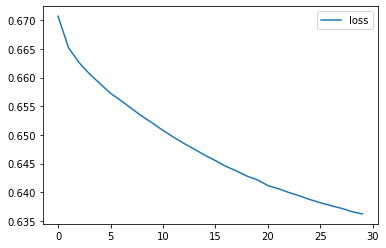

In [40]:
pd.DataFrame(history.history)[['loss']].plot()

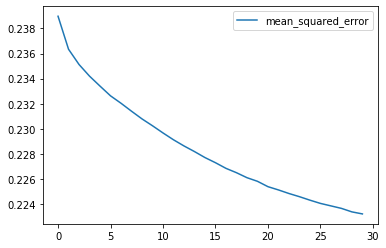

In [41]:
pd.DataFrame(history.history)[['mean_squared_error']].plot()

In [43]:
model = models.load_model('./saved_model/switch_0429.h5')

In [ ]:
#####

In [46]:
df_table.loc[:,['target', 'occur']].to_numpy()

array([['102ca9ccb86811e9b0f5acde48001122', 45],
       ['e360cdcab86611e987efacde48001122', 134],
       ['baaadc26b86711e9b9cbacde48001122', 48],
       ...,
       ['e33344e8b86611e98696acde48001122', 442],
       ['e34457bab86611e9a371acde48001122', 20],
       ['17aee940b86711e9a801acde48001122', 7]], dtype=object)

In [60]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='binary:logistic')
model.fit(df_table['occur'].to_numpy().reshape(-1,1), df_table['Ground_Truth'].to_numpy())

XGBoostError: [23:51:39] /workspace/src/c_api/../data/../common/common.h:41: /workspace/src/predictor/../common/device_helpers.cuh: 126: invalid device ordinal
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x54) [0x7f1753ff7614]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dh::ThrowOnCudaError(cudaError, char const*, int)+0x159) [0x7f17541eec29]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dh::MaxSharedMemory(int)+0x24) [0x7f17542ac354]
  [bt] (3) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::predictor::GPUPredictor::Configure(std::vector<std::pair<std::string, std::string>, std::allocator<std::pair<std::string, std::string> > > const&)+0x19) [0x7f17542ac389]
  [bt] (4) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::gbm::GBTree::Configure(std::vector<std::pair<std::string, std::string>, std::allocator<std::pair<std::string, std::string> > > const&)+0x18b) [0x7f17540a77cb]
  [bt] (5) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::LearnerImpl::Configure()+0x4c6) [0x7f17540e8cb6]
  [bt] (6) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::LearnerImpl::UpdateOneIter(int, xgboost::DMatrix*)+0x6d) [0x7f17540e369d]
  [bt] (7) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(XGBoosterUpdateOneIter+0x29) [0x7f1753fe6639]
  [bt] (8) /usr/lib/x86_64-linux-gnu/libffi.so.6(ffi_call_unix64+0x4c) [0x7f17e1842dae]



In [61]:
from sklearn.linear_model  import LogisticRegression
model = LogisticRegression()
model.fit(df_table['occur'].to_numpy().reshape(-1,1), df_table['Ground_Truth'].to_numpy())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#####

In [57]:
df_table_testday = pd.concat(lt_df_NN_rank[15+54:], ignore_index=True)

In [58]:
df_table_testday.drop_duplicates(inplace=True, ignore_index=True)

In [59]:
df_table_testday.describe()

,rank,NN_rank
count,810982.00,810982.00
mean,25.83,26.63
std,26.32,24.95
min,1.00,1.00
25%,5.00,6.00
50%,15.00,18.00
75%,40.00,41.00
max,99.00,99.00


In [60]:
df_table_testday = pd.merge(df_table_testday, pd.DataFrame(table_grby.size()), on=['target'], how='left')

In [61]:
df_table_testday.rename(columns = {0:'occur'}, inplace=True)

In [62]:
df_table_testday['occur'].fillna(1, inplace=True)

In [63]:
def pred(df):
    if df['target'] not in emb:
        return 0
    else:
        return model.predict(np.append(emb[df['target']], df['occur_log']).reshape(1, -1))[0][0]

In [64]:
from multiprocessing import Pool
def parallelize_dataframe(df, func, n_cores=8):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [65]:
max_occur = max(df_table_testday['occur'])

In [83]:
def add_features(df_table_testday):
#     df_table_testday['Ground_Truth'] = df_table_testday.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)
#     df_table_testday['occur_log'] = df_table_testday.apply(lambda df: log10(df['occur'])/log10(max_occur), axis=1)
#     df_table_testday['pred_score'] = df_table_testday.apply(pred, axis=1)
    df_table_testday['pred'] = df_table_testday.apply(lambda df: True if df['pred_score'] > 0.5 else False, axis=1)
    df_table_testday['pred_switch'] = df_table_testday.apply(lambda df: df['NN_rank'] if df['pred'] else df['rank'], axis=1)
    return df_table_testday

In [84]:
df_table_testday = parallelize_dataframe(df_table_testday, add_features)

In [79]:
df_table_testday['pred_score'] = df_table_testday.apply(pred, axis=1)

In [85]:
df_table_testday

,target,next,rank,NN_rank,occur,Ground_Truth,occur_log,pred_score,pred,pred_switch
0,e3390966b86611e9bb8facde48001122,8bf8b80cb86811e9972dacde48001122,16.00,35,175.00,False,0.61,0.26,False,16.00
1,8bf8b80cb86811e9972dacde48001122,f5adf298b86611e9930dacde48001122,11.00,13,106.00,False,0.55,0.49,False,11.00
2,f5adf298b86611e9930dacde48001122,f5accde4b86611e9acc7acde48001122,80.00,68,114.00,True,0.56,0.39,False,80.00
3,f5accde4b86611e9acc7acde48001122,571cafe2b86c11e99481acde48001122,1.00,40,9.00,False,0.26,0.35,False,1.00
4,571cafe2b86c11e99481acde48001122,8bf8b80cb86811e9972dacde48001122,36.00,58,1.00,False,0.00,0.26,False,36.00
...,...,...,...,...,...,...,...,...,...,...
810977,56dd0c00b86c11e993e3acde48001122,c2d5056eb86911e9b888acde48001122,65.00,12,1.00,True,0.00,0.32,False,65.00
810978,470a8500b86711e9a854acde48001122,470a8e88b86711e9853aacde48001122,25.00,9,27.00,True,0.39,0.38,False,25.00
810979,06f92b38b86711e9a019acde48001122,070838e4b86711e98c7bacde48001122,8.00,13,15.00,False,0.32,0.56,True,13.00
810980,e376ed6cb86611e982b2acde48001122,0714dd42b86711e988c6acde48001122,16.00,37,37.00,False,0.42,0.57,True,37.00


In [86]:
df_table_testday.describe()

,rank,NN_rank,occur,occur_log,pred_score,pred_switch
count,810982.00,810982.00,810982.00,810982.00,810982.00,810982.00
mean,25.83,26.63,27.90,0.25,0.39,25.06
std,26.32,24.95,79.57,0.18,0.12,25.67
min,1.00,1.00,1.00,0.00,0.01,1.00
25%,5.00,6.00,2.00,0.08,0.30,5.00
50%,15.00,18.00,9.00,0.26,0.38,15.00
75%,40.00,41.00,25.00,0.38,0.46,39.00
max,99.00,99.00,4931.00,1.00,0.98,99.00


In [87]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df_table_testday['Ground_Truth'].tolist(),df_table_testday['pred']))

              precision    recall  f1-score   support

       False       0.58      0.87      0.70    452057
        True       0.55      0.20      0.29    358925

    accuracy                           0.57    810982
   macro avg       0.57      0.54      0.49    810982
weighted avg       0.57      0.57      0.52    810982

